# Predicting stock price movements with indicators:

1) Simple Stock Online News Rating System

1.1) Intro (Ez Example)

1.2) With API


2) Word Search Count Rating System

2.1) With API

- It is believed that most would make decisions based on latest news that provides information related to stocks of investor's interest or look up their stocks online to determine growth performance of stock.


- The motive of this research project is to determine if indicators mentioned above are correlated to direction and magnitude of movement of stock price.

## 1) Simple Stock Online News Rating System

### 1.1) Intro (Example with Apple News during current coronavirus period)

In [1]:
# Import required packages
import bs4
import pandas as pd
import requests
import datetime
import calendar
import os
import matplotlib.pyplot as plt
from alpha_vantage.timeseries import TimeSeries

In [2]:
# Set as current directory
os.chdir('C:\\Users\\UX330\\Documents\\A Uni\\Git\\Python project self research\\Project 1')

### a.)

In [3]:
# Execute function with API keys
with open('ak.txt', 'r') as myFile:
    keys=myFile.read()
    ts=TimeSeries(key=keys, output_format='pandas')

In [4]:
# Get the data
aapl_day, meta_data=ts.get_daily(symbol='AAPL', outputsize='full')

In [5]:
# Display first few rows of data
aapl_day.head()

,3. low,2. high,5. volume,1. open,4. close
date,,,,,
2000-03-20,122.37,126.25,1825800.0,123.50,123.00
2000-03-21,121.62,136.75,4681500.0,122.56,134.94
2000-03-22,131.56,144.38,5071400.0,132.78,144.19
2000-03-23,140.00,150.38,5022900.0,142.00,141.31
2000-03-24,135.50,143.94,3990300.0,142.44,138.69


In [7]:
# Resampling weekend stock data by interpolation and extracting only data from 1st January 2020 onwards 
# to match stock data since the beginning of coronavirus.
aapl_day=aapl_day.resample('24h').interpolate()
aapl_close=aapl_day['4. close']
aapl_day_2019=pd.DataFrame(aapl_close['2020-01-01':])

In [8]:
# Determine average returns to be set as benchmarks in later indictaor
aapl_returns=aapl_day_2019.pct_change()
aapl_mean_returns=aapl_returns.mean()
aapl_mean_returns

4. close   -0.003009
dtype: float64

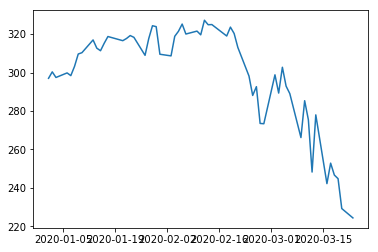

In [9]:
# Plot of stock price (closing)
plt.plot(aapl_day_2019)

### b.)

In [10]:
# Getting latest Apple news from bbc website

bbc_url = 'https://www.bbc.com/news/topics/crr7mlg0gqqt/apple'
bbc_response = requests.get(bbc_url)
bbc_title=[]
bbc_publish_date=[]

bbc_soup = bs4.BeautifulSoup(bbc_response.text, 'lxml')
bbc_headlines = bbc_soup.find_all(attrs={"class": "lx-stream-post__header-text"})


bbc_all_dates=bbc_soup.find_all(attrs={"class": "qa-meta-date gs-u-mr gs-u-display-inline-block"})
#all_dates2=soup.find_all(attrs={"class": "qa-meta-date gs-u-mr gs-u-display-inline-block"})


for bbc_headline in bbc_headlines:
    bbc_title.append(bbc_headline.text)
    
for bbc_dates in bbc_all_dates:
    bbc_publish_date.append(bbc_dates.text)

In [11]:
bbc_title

['How to make a WhatsApp video call',
 'How to receive a video call without apps',
 'How to make a FaceTime call',
 'Smartphone sales collapse amid coronavirus crisis',
 'Apple hit with record €1.1bn fine in France',
 "Apple's annual showcase, WWDC, online only",
 'Apple reopens all its China stores',
 'Tricks and tools for better working from home',
 'Chinese pair charged with iTunes money laundering',
 'Apple settles iPhone slowdown case for $500m']

In [12]:
bbc_publish_date

['22 Mar',
 '22 Mar',
 '22 Mar',
 '20 Mar',
 '16 Mar',
 '13 Mar',
 '13 Mar',
 '10 Mar',
 '3 Mar',
 '2 Mar']

In [13]:
for i in range(0,len(bbc_publish_date)):
    bbc_publish_date[i]=bbc_publish_date[i]+' 2020'
    bbc_publish_date[i]= datetime.datetime.strptime(bbc_publish_date[i], '%d %b %Y')

bbc_publish_date

[datetime.datetime(2020, 3, 22, 0, 0),
 datetime.datetime(2020, 3, 22, 0, 0),
 datetime.datetime(2020, 3, 22, 0, 0),
 datetime.datetime(2020, 3, 20, 0, 0),
 datetime.datetime(2020, 3, 16, 0, 0),
 datetime.datetime(2020, 3, 13, 0, 0),
 datetime.datetime(2020, 3, 13, 0, 0),
 datetime.datetime(2020, 3, 10, 0, 0),
 datetime.datetime(2020, 3, 3, 0, 0),
 datetime.datetime(2020, 3, 2, 0, 0)]

In [14]:
data={'News': bbc_title, 'Date': bbc_publish_date}
data_df=pd.DataFrame(data=data)
data_df

,Date,News
0,2020-03-22,How to make a WhatsApp video call
1,2020-03-22,How to receive a video call without apps
2,2020-03-22,How to make a FaceTime call
3,2020-03-20,Smartphone sales collapse amid coronavirus crisis
4,2020-03-16,Apple hit with record €1.1bn fine in France
5,2020-03-13,"Apple's annual showcase, WWDC, online only"
6,2020-03-13,Apple reopens all its China stores
7,2020-03-10,Tricks and tools for better working from home
8,2020-03-03,Chinese pair charged with iTunes money laundering
9,2020-03-02,Apple settles iPhone slowdown case for $500m


### c.)

In [16]:
data_df['Expected']=0
indicator=data_df['Expected']
n=len(data_df)

for i in range(0,n):
    indicator[i]=input()

data_df['Expected']=indicator

0


C:\Users\UX330\Anaconda3\envs\env_zipline\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0
0
-1
-1
-1
1
0
0
-1


In [17]:
# Extracted data from bbc apple news website and also predicted stock price rise/fall indicator
aapl_day_2019=aapl_day_2019.reset_index()
data_df

,Date,News,Expected
0,2020-03-22,How to make a WhatsApp video call,0
1,2020-03-22,How to receive a video call without apps,0
2,2020-03-22,How to make a FaceTime call,0
3,2020-03-20,Smartphone sales collapse amid coronavirus crisis,-1
4,2020-03-16,Apple hit with record €1.1bn fine in France,-1
5,2020-03-13,"Apple's annual showcase, WWDC, online only",-1
6,2020-03-13,Apple reopens all its China stores,1
7,2020-03-10,Tricks and tools for better working from home,0
8,2020-03-03,Chinese pair charged with iTunes money laundering,0
9,2020-03-02,Apple settles iPhone slowdown case for $500m,-1


### d.)

In [18]:
data_df_date=data_df['Date']
aapl_date=aapl_day_2019['date']
#data_df['Observed']=''
#data_df['Returns']=''
all_observed=[]
all_returns=[]

for i in range(0,len(data_df)): 
    row_index_1=aapl_date.loc[aapl_date == data_df_date[i]].index
    row_index_1=row_index_1[0]
    row_index_2=row_index_1+1
    value_1, value_2= aapl_day_2019.iloc[row_index_1]['4. close'], aapl_day_2019.iloc[row_index_2]['4. close']
    returns=((value_2-value_1)/value_2)
    
    if returns<=float(aapl_mean_returns):
        all_observed.append(-1)
    else:
        all_observed.append(1)
        
    all_returns.append(returns)
    

In [19]:
data_df['Observed']=all_observed
data_df['Returns']=all_returns


In [20]:
data_df

,Date,News,Expected,Observed,Returns
0,2020-03-22,How to make a WhatsApp video call,0,-1,-0.007235
1,2020-03-22,How to receive a video call without apps,0,-1,-0.007235
2,2020-03-22,How to make a FaceTime call,0,-1,-0.007235
3,2020-03-20,Smartphone sales collapse amid coronavirus crisis,-1,-1,-0.007132
4,2020-03-16,Apple hit with record €1.1bn fine in France,-1,1,0.042118
5,2020-03-13,"Apple's annual showcase, WWDC, online only",-1,-1,-0.044804
6,2020-03-13,Apple reopens all its China stores,1,-1,-0.044804
7,2020-03-10,Tricks and tools for better working from home,0,-1,-0.035980
8,2020-03-03,Chinese pair charged with iTunes money laundering,0,1,0.044328
9,2020-03-02,Apple settles iPhone slowdown case for $500m,-1,-1,-0.032801


### e.)

In [21]:
data_df_2=data_df[data_df['Expected']!=0]
data_df_2

,Date,News,Expected,Observed,Returns
3,2020-03-20,Smartphone sales collapse amid coronavirus crisis,-1,-1,-0.007132
4,2020-03-16,Apple hit with record €1.1bn fine in France,-1,1,0.042118
5,2020-03-13,"Apple's annual showcase, WWDC, online only",-1,-1,-0.044804
6,2020-03-13,Apple reopens all its China stores,1,-1,-0.044804
9,2020-03-02,Apple settles iPhone slowdown case for $500m,-1,-1,-0.032801


## Summary
It seems that the Apple News was only abe to get predict 60% of the stock price movements correctly( 3 out of 5),
but note that:

1) this is only a very small dataset as example

2) coronavirus virus certainly adds to the market uncertainty and stockholder panicking 

thus making it hard to predict future market movements although long term trend is a 
expected to be a downward slide in prices as seen in earlier plots.

# To Be Continued....